In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [12]:
# Step 1: Choose a binary classification dataset
# Using the attached breast cancer dataset where 'diagnosis' is the target (M: malignant=1, B: benign=0)
df = pd.read_csv('data.csv')

# Map diagnosis to binary: M=1, B=0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Features: all columns except id and diagnosis
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

# Handle missing values with imputation (mean strategy)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [13]:
# Step 2: Train/test split and standardize features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Step 3: Fit a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [15]:
# Step 4: Evaluate with confusion matrix, precision, recall, ROC-AUC
y_pred = model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

y_proba = model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)

print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("ROC-AUC:", roc_auc)

Confusion Matrix:
 [[70  1]
 [ 2 41]]
Precision: 0.9761904761904762
Recall: 0.9534883720930233
ROC-AUC: 0.99737962659679


In [16]:
# Step 5: Tune threshold and explain sigmoid function

# Explanation of sigmoid function:
# The sigmoid function is used in logistic regression to map the linear combination of features (z = w0 + w1*x1 + ... + wn*xn)
# to a probability between 0 and 1. It is defined as:
# sigmoid(z) = 1 / (1 + exp(-z))
# This function transforms any real-valued number into the (0, 1) range, making it suitable for binary classification probabilities.

# Tune threshold: Find optimal threshold based on ROC curve for best trade-off (e.g., maximizing Youden's J statistic: sensitivity + specificity - 1)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
youden_j = tpr - fpr
optimal_idx = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_idx]

print("Optimal Threshold:", optimal_threshold)

# Predict with tuned threshold
y_pred_tuned = (y_proba >= optimal_threshold).astype(int)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)

print("Tuned Confusion Matrix:\n", conf_matrix_tuned)
print("Tuned Precision:", precision_tuned)
print("Tuned Recall:", recall_tuned)

Optimal Threshold: 0.4848266846555633
Tuned Confusion Matrix:
 [[70  1]
 [ 1 42]]
Tuned Precision: 0.9767441860465116
Tuned Recall: 0.9767441860465116


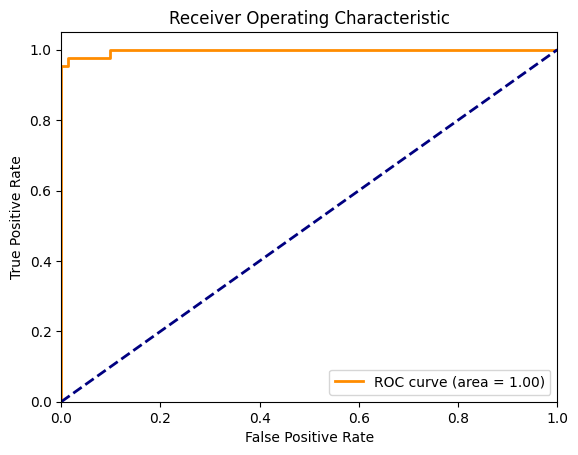

In [17]:
# Optional: Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()